## задание 2c Касьянов Глеб

![](images/1_2c.png "Задача")
![](images/1_2c_1.png "Задача_1")

## Исследуем метод Адамса на устойчивость

Рассмотрим задачу
$$ \cfrac{dy}{dt} = \lambda y$$
Распишем метод Адамса в виде
$$y_{i+1} -y_{i}(1 + \cfrac{23}{12}z) + \cfrac{16}{12} z y_{i-1} - \cfrac{5}{12} z y_{i-2} = 0$$
Где $z = \Delta t * \lambda$. Составим кубическое уравнение
$$t^3-t^2(1+\cfrac{23}{12}z) + \cfrac{16}{12}t z - \cfrac{5}{12} z = 0$$
Решив его, я получил три разных решения, метод будет устойчивым на области, где модуль решения меньше 1. На графике эта область закрашена жёлтым.

![](images/math_3.png "График_устойчивости")

В файле 1_2_3.mw подробный разбор.

## реализация метода. График

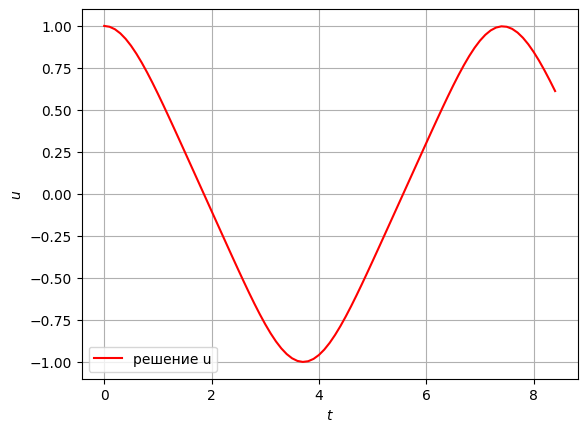

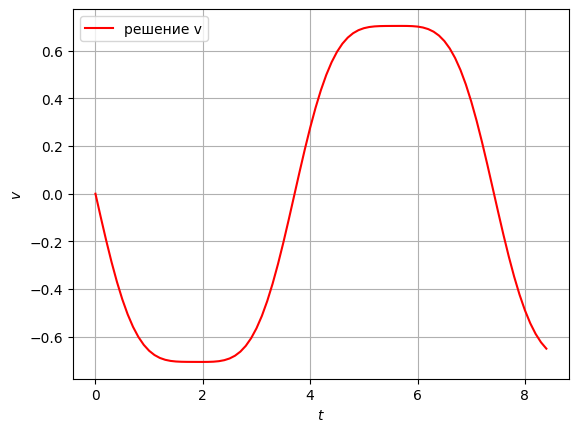

In [39]:
import math as ma
import matplotlib.pyplot as plt
import numpy as np
from scipy import optimize

class Arr:
    value = []

    def __init__(self, x):
        self.value = x
    
    def __mul__(self, a):
        res = []
        for i in self.value:
            res.append(i * a)
        return Arr(res)

    def __truediv__(self, a):
        return self * (1/a)

    def __add__(self, y):
        res = []
        for i in range(len(self.value)):
            res.append(self.value[i] + y.value[i])
        return Arr(res)

    def __sub__(self, y):
        return self + y * (-1)

    def rang(self):
        res = 0
        for i in self.value:
            res = res + i * i
        return ma.sqrt(res)

def f(x):
    return Arr([x.value[1], (-1)*pow(x.value[0], 3)])

class Funtion:
    y0 = 0
    y1 = 0
    step = 0
    fun = 0

    def __init__(self, dt, y, f):
        self.y0 = y[0]
        self.y1 = y[1]
        self.step = dt
        self.fun = f

    def f(self, x):
        res = Arr([0, 0])
        x_ = Arr(x)
        res = x_ - self.fun(x_) * self.step * 5 / 12 - self.y1 - self.fun(self.y1) * self.step * 8 / 12 + self.fun(self.y0) * self.step * 1 / 12
        return res.value

def next_y(i, y, dt):
    if(i < 2):
        #метод рунге кнута 3 порядка
        res_1 = Arr([0, 0])
        c = [0, 1/3, 2/3]
        b = [1/4, 0, 3/4]
        a = [[0, 0, 0],
             [1/3, 0, 0],
             [0, 2/3, 0],]
        k = [f(y[i])]
        for j in [1, 2]:
            res_2 = Arr([0, 0])
            for m in range(j):
                res_2 = res_2 + k[m] * a[j][m]
            k.append(f(y[i] + res_2 * dt))
        for j in range(3):
            res_1 = res_1 + k[j] * b[j]
        return y[i] + res_1 * dt
    else:
        return y[i] + (f(y[i]) * 23 - f(y[i-1]) * 16 + f(y[i - 2]) * 5) * dt / 12

def solve(zero, dt, stop):
    result = [zero]
    i = 0
    while(dt * (i + 1) < stop):
        result.append(next_y(i, result, dt))
        i = i + 1
    return result

zero = Arr([1, 0])   # краевые условия
T = 7.416298709205487  # период
dt = 0.1               # шаг
N_ = 100                # количество узлов
result = solve(zero, dt, T + 1)
u = []
v = []
t = []
i = 0
for j in result:
    u.append(j.value[0])
    v.append(j.value[1])
    t.append(i * dt)
    i = i + 1
plt.plot(t, u, "r", label = "решение u")
plt.legend()
plt.grid()
plt.xlabel('$t$')
plt.ylabel('$u$')
plt.show()

plt.plot(t, v, "r", label = "решение v")
plt.legend()
plt.grid()
plt.xlabel('$t$')
plt.ylabel('$v$')
plt.show()

## Сходимость

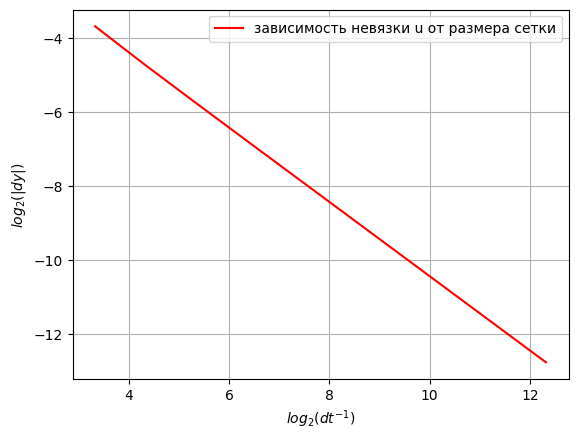

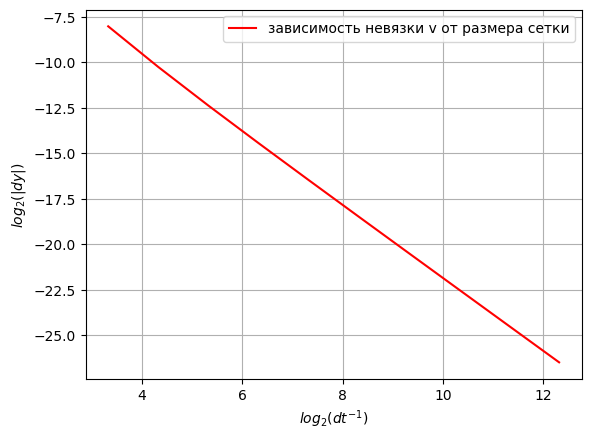

3.045961558510589


In [41]:


dt = 0.1
N_ = 100
N = 10 # к-во точек
dres = [] #разница
y_1 = []
y_2 = []
x = []
for i in range(N):
    result = solve(zero, T/N_, T)
    #y.append(1.3*ma.log2(((result[int(T/dt) - 1] - result[int(T/dt)])*(int(T/dt) + 1 - T/dt) + result[int(T/dt) + 1] - result[0]).rang()))
    #a1 = (result[int(T/dt) + 1] - result[int(T/dt) - 1] - (result[int(T/dt)] - result[int(T/dt) - 1]) * 2) / (2*dt*dt)
    #b1 = (result[int(T/dt)] - result[int(T/dt) - 1] - a1 * (dt * dt - 2 * int(T/dt) * dt * dt)) / (dt)
    #c1 = result[int(T/dt) - 1] - a1 * pow(((int(T/dt) - 1) * dt), 2) - b1 * ((int(T/dt) - 1) * dt)
    #y.append(ma.log2(((a1 * T * T + b1 * T + c1 - result[0]).rang())))
    y_1.append(ma.log2(abs((result[0] - result[len(result) - 1]).value[1])))
    y_2.append(ma.log2(abs((result[0] - result[len(result) - 1]).value[0])))
    x.append(ma.log2(1/dt))
    N_ = N_ * 2
    dt = dt / 2
plt.plot(x, y_1, "r", label = "зависимость невязки u от размера сетки")
plt.legend()
plt.grid()
plt.xlabel('$log_2(dt^{-1})$')
plt.ylabel('$log_2(|dy|)$')
plt.show()

plt.plot(x, y_2, "r", label = "зависимость невязки v от размера сетки")
plt.legend()
plt.grid()
plt.xlabel('$log_2(dt^{-1})$')
plt.ylabel('$log_2(|dy|)$')
plt.show()

def aver(x):
    res = 0
    for i in x:
        res = res + i
    return res/len(x)

def k(x, y):
    a = 0
    b = 0
    for i in range(len(x)):
       a = a + (x[i] - aver(x)) * y[i]
       b = b + (x[i] - aver(x)) ** 2
    return a/b

print((-1)*(k(x, y_1) + k(x, y_2)))

У данного метода порядок апроксимации 3. Я вывел зависимость невязки от шага сетки. По наклону графика видно, что порядок апроксимации 3.

$f_{1}$ и $f_{2}$ я нашёл при помощи метода Рунге-Кутты 3 порядка.
Матрица Бутчера
    
|0             |              |              |              |
|:------------:|:------------:|:------------:|:------------:|
|$\cfrac{1}{3}$|$\cfrac{1}{3}$|              |              |
|$\cfrac{2}{3}$|0             |$\cfrac{2}{3}$|              |
|              |$\cfrac{1}{4}$|0             |$\cfrac{3}{4}$|